In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
df_coord=pd.read_csv("places.csv")
df_coord

,Longitude,Latitude,Landamrk
0,76.275140,9.990688,Mangalavanam Bird Sanctuary
1,76.264750,9.960591,Mattancherry Palace
2,76.267070,9.985700,Bolgatty Palace and Island Resort
3,76.242841,9.965472,Santa Cruz Cathedral Basilica Fort Kochi
4,76.282248,9.968826,Ernakulam siva Temple
5,76.275029,9.980605,Marine Drive Kochi
6,76.244751,9.959746,Indian Naval Maritime Museum
7,76.363969,9.952907,Hill Palace
8,76.391157,9.933408,Chottanika Temple
9,76.239860,9.962632,Bishops House


In [17]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans to find 3 clusters
kmeans_1 = KMeans(n_clusters=3)
# Using fit_predict to cluster the dataset
X = df_coord[['Longitude','Latitude']].values
predictions = kmeans_1.fit_predict(X)

In [18]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [19]:
clustered.drop('index', axis=1, inplace=True)

In [21]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
     ]
choices = ['Monday', 'Tuesday', 'Wednesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')

In [22]:
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landamrk,Cluster,Vacation Day
0,76.275140,9.990688,Mangalavanam Bird Sanctuary,0,Monday
23,76.240129,9.962388,Indo Portuguese Museum,0,Monday
21,76.242348,9.969805,Chinese Fishing Nets,0,Monday
20,76.241184,9.967628,Bastion Bunglow,0,Monday
19,76.249988,9.990090,Basilica of Our Lady of Ransom,0,Monday
18,76.298996,9.933338,Kerala Folklore Museum,0,Monday
17,76.279345,9.971657,Subhash Bose Park,0,Monday
13,76.244270,9.967623,Fort Kochi,0,Monday
24,76.259413,9.957753,Paradesi Jewish Synagogue,0,Monday
25,76.240910,9.966783,St. Francis CSI Church,0,Monday


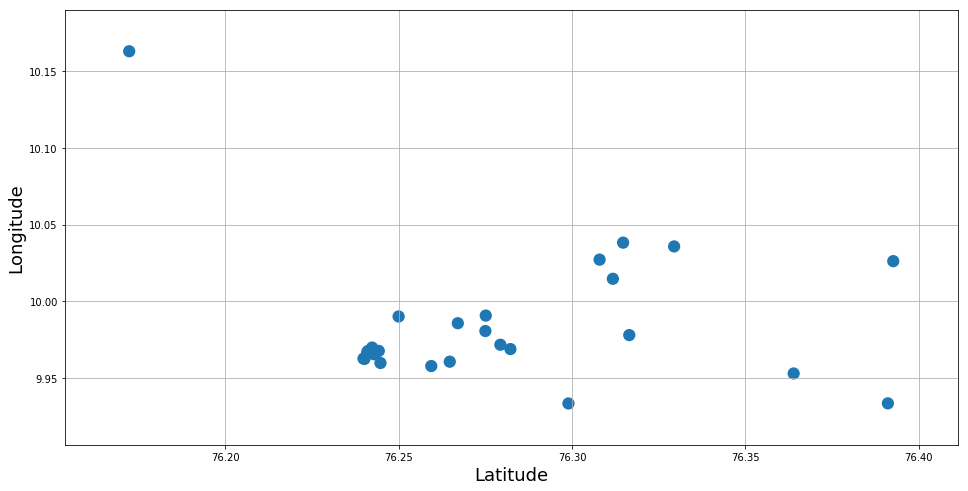

In [15]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
centers = kmeans_1.cluster_centers_
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()